In [50]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

# Using Lagrange interpolation

In [51]:
points = np.linspace(-1,1,21)

In [52]:
def runge(x):
    return 1/(1+25*x**2)

In [53]:
def lagrange(x,pts,func):
    pts_lens = pts.shape[0]
    output = 0
    for i in range(pts_lens):
        temp = 1
        for j in range(pts_lens):
            if (i==j):
                continue
            else:
                temp*=(x-pts[j])/(pts[i]-pts[j])
        output+=temp*func(pts[i])
    return output

def lagrange_array(x,pts,func):
    output = [lagrange(i,pts,func) for i in x]
    return np.asarray(output)

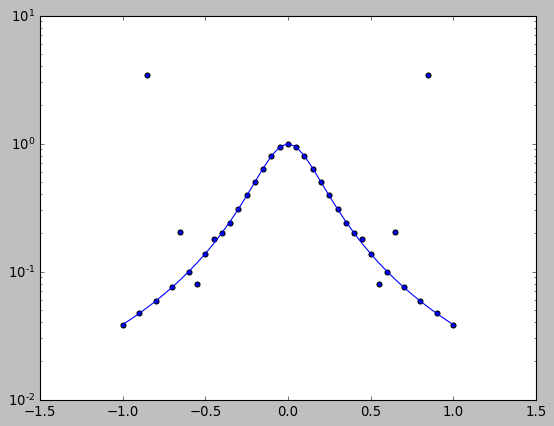

In [54]:
xs = np.linspace(-1,1,41)
plt.semilogy(xs,runge(xs))
ys = lagrange_array(xs,points,runge)
plt.scatter(xs,ys)

# Chebyshev interpolation

In [55]:
def Tn(x,n):
    return np.cos(n*np.arccos(x))

In [64]:
def c_N_m(N,m,func):
    factor = 2 / N
    if m==0:
        factor/=2
    output = 0
    for i in range(N):
        output += np.cos(m*np.pi*(i+0.5)/N)*func(np.cos(np.pi*(i+0.5)/N))
    return output*factor

def Che(x,N,func):
    output = 0
    for i in range(N):
        output+=Tn(x,i)*c_N_m(N,i,func)
    return output

def Che_array(xs,N,func):
    output = [Che(i,N,func) for i in xs]
    return np.asarray(output)

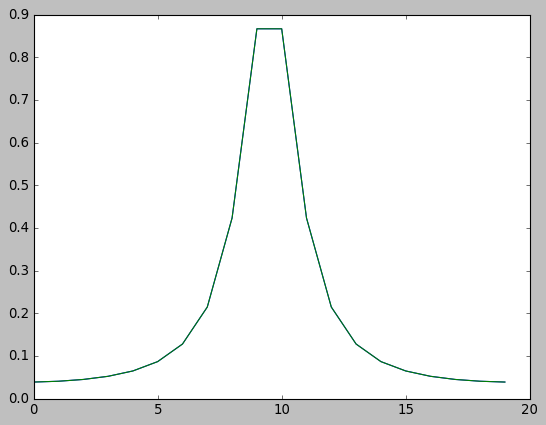

In [65]:
x_che = np.cos(np.pi*(np.arange(0,20)+1/2)/20)
plt.plot(runge(x_che))
plt.plot(Che_array(x_che,20,runge))

# Cubic Spline interpolation
## with period/nature boundary condition

In [69]:
def trd_sp(ptsx, ptsy,type = 0):#type = 0: period BC, type = 1: natural BC
    # common set up
    h = [ptsx[i+1] - ptsx[i] for i in range(len(ptsx)-1)]
    mu = [h[i]/(h[i]+h[i+1]) for i in range(len(h)-1)]
    lam = [h[i+1]/(h[i]+h[i+1]) for i in range(len(h)-1)]
    d = [6*(ptsy[i]/h[i]/(h[i]+h[i+1])+ptsy[i+2]/h[i+1]/(h[i]+h[i+1])-ptsy[i+1]/h[i]/h[i+1]) for i in range(len(h)-1)]
    # set up to different BC
    if (type = 0):
        d = 

In [70]:
trd_sp(points,runge(points))

[0.09999999999999998, 0.09999999999999998, 0.10000000000000009, 0.09999999999999998, 0.09999999999999998, 0.10000000000000009, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.10000000000000009, 0.10000000000000009, 0.09999999999999987, 0.10000000000000009, 0.09999999999999987, 0.10000000000000009, 0.10000000000000009, 0.09999999999999987, 0.10000000000000009, 0.09999999999999987] 
 [0.5, 0.4999999999999997, 0.5000000000000002, 0.5, 0.4999999999999997, 0.5000000000000002, 0.5, 0.5, 0.5, 0.4999999999999997, 0.5, 0.5000000000000006, 0.49999999999999944, 0.5000000000000006, 0.49999999999999944, 0.5, 0.5000000000000006, 0.49999999999999944, 0.5000000000000006] 
 [[0.5, 0.5000000000000002, 0.4999999999999997, 0.5, 0.5000000000000002, 0.4999999999999997, 0.5, 0.5, 0.5, 0.5000000000000002, 0.5, 0.49999999999999944, 0.5000000000000006, 0.49999999999999944, 0.5000000000000006, 0.5, 0.49999999999999944, 0.5000000000000006, 0.49999999999999944]]
